In [1]:
import numpy as np
from starfish.plot import *
from starfish.galaxy.power import P_lin_w0wacdm

In [2]:
from starfish.set import settings
settings.cosmo_value

[0.32, 0.049, 0.67, 0.96, 0.81, 0.06, 3.044, -1, 0]

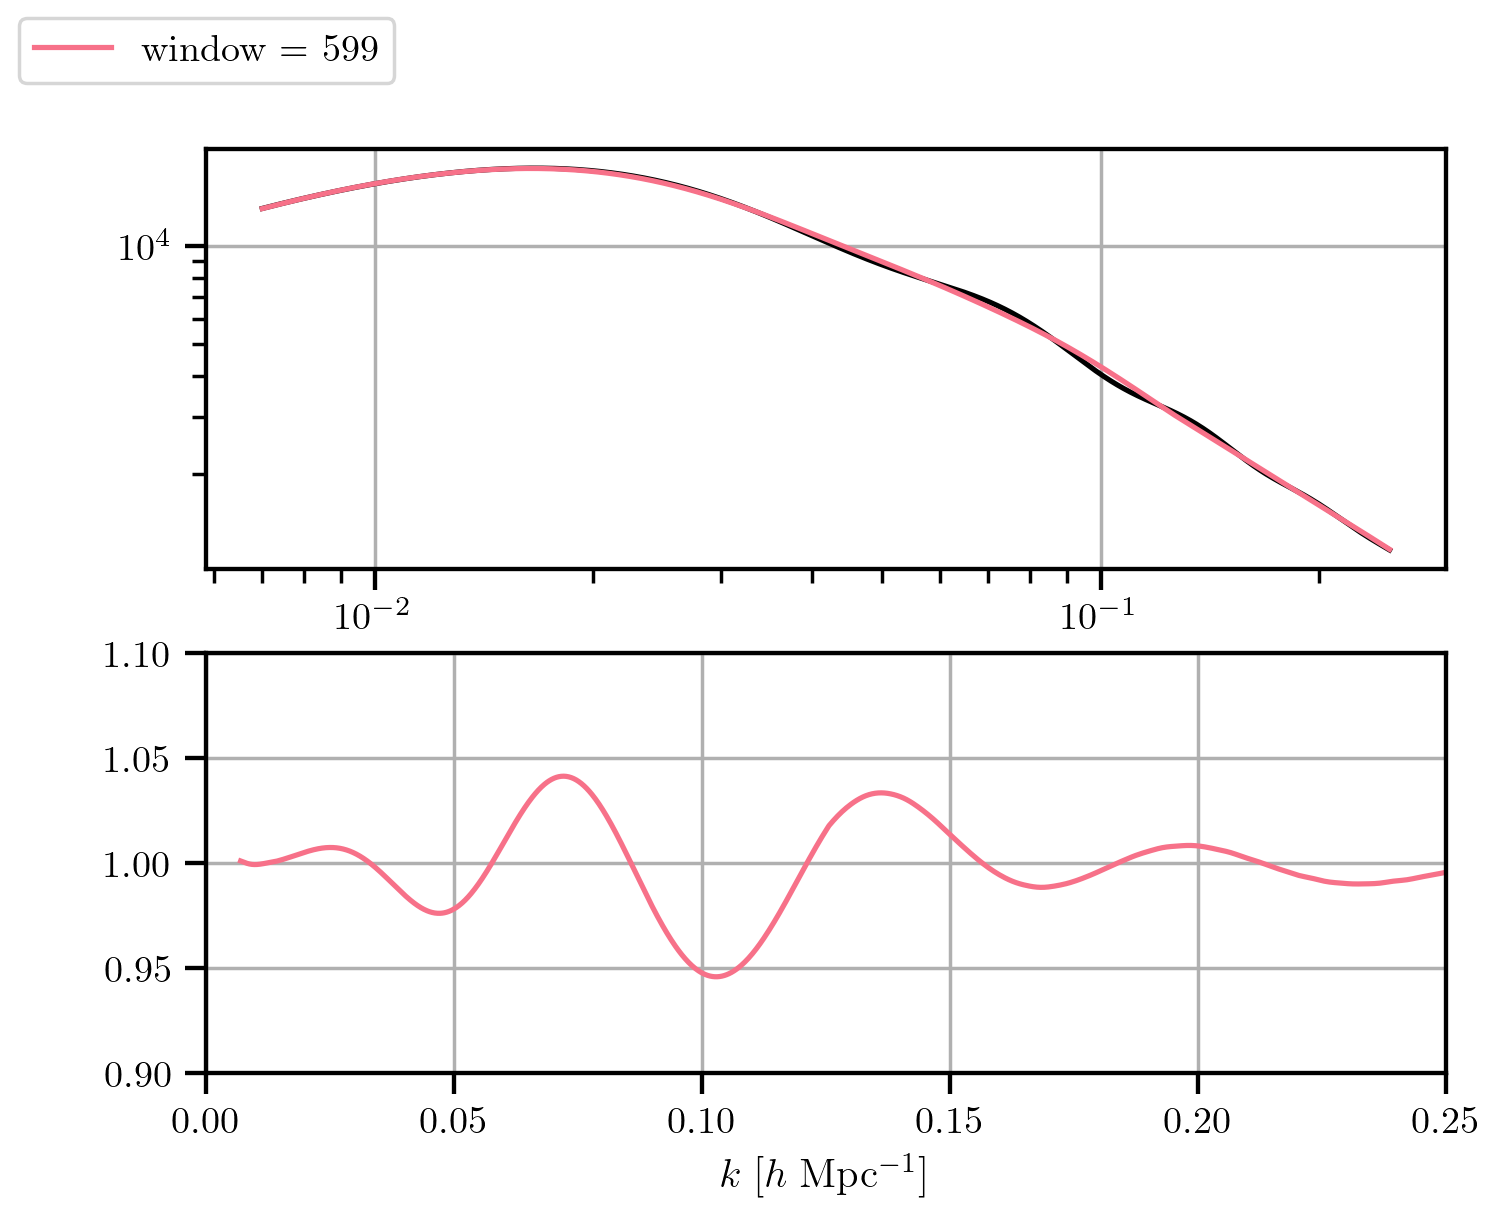

In [3]:
pars,res,PK=P_lin_w0wacdm(*settings.cosmo_value)
check_wiggle(PK,window_array=settings.window_len)

In [3]:
from starfish.galaxy.fisher import get_Fisher
fisher=get_Fisher(lcdm=False)

process started!
fiducial biases and volumes:
(z = 0.3)
-- b_fid: 0.99
-- V_fid: 9.27e+08
(z = 0.5)
-- b_fid: 1.09
-- V_fid: 2.02e+09
(z = 0.7)
-- b_fid: 1.21
-- V_fid: 3.12e+09
(z = 0.9)
-- b_fid: 1.33
-- V_fid: 4.08e+09
(z = 1.1)
-- b_fid: 1.45
-- V_fid: 4.86e+09
(z = 1.3)
-- b_fid: 1.57
-- V_fid: 5.46e+09
fiducial values:
-- omega_m0: 0.3200000900104817
-- omega_b0: 0.049
--        h: 0.67
--      n_s: 0.96
--  sigma_8: 0.8099999999999994
--     m_nu: 0.06000375968353048
--    N_eff: 3.0440000000000005
--       w0: -1.0
--       wa: 0.0
--     p_s1: 0.0
--     p_s2: 0.0
--     p_s3: 0.0
--     p_s4: 0.0
--     p_s5: 0.0
--     p_s6: 0.0
--    lnbs1: -0.38034936939565467
--    lnbs2: -0.37997205395128514
--    lnbs3: -0.37959991351176114
--    lnbs4: -0.37923687026778485
--    lnbs5: -0.37888470425441906
--    lnbs6: -0.3785438637840988
calculating fiducial H(z), DA(z) and f(z,k)...  done!
all necessary fiducial values done!
calculating partial derivatives w.r.t cosmological paramete

In [4]:
import pandas as pd
cov=pd.DataFrame(np.linalg.inv(fisher.values),index=fisher.index,columns=fisher.columns)

In [5]:
name_width=max([len(v) for v in settings.var_name])
error_dict=dict(zip(settings.var_name,np.sqrt(np.diag(cov.values))))
print('1-sigma errors:')
for key in error_dict.keys():
    print(f'-- {key.rjust(name_width)}: {error_dict[key]:.1e}')

1-sigma errors:
-- omega_m0: 3.6e-02
-- omega_b0: 8.8e-03
--        h: 2.6e-02
--      n_s: 4.3e-02
--  sigma_8: 4.1e-02
--     m_nu: 4.5e-01
--    N_eff: 8.0e-01
--       w0: 1.6e-01
--       wa: 8.4e-01
--     p_s1: 2.3e-01
--     p_s2: 3.3e-01
--     p_s3: 5.7e-01
--     p_s4: 1.6e+00
--     p_s5: 4.3e+00
--     p_s6: 2.2e+01
--    lnbs1: 3.1e-02
--    lnbs2: 3.3e-02
--    lnbs3: 3.4e-02
--    lnbs4: 3.4e-02
--    lnbs5: 3.4e-02
--    lnbs6: 3.5e-02


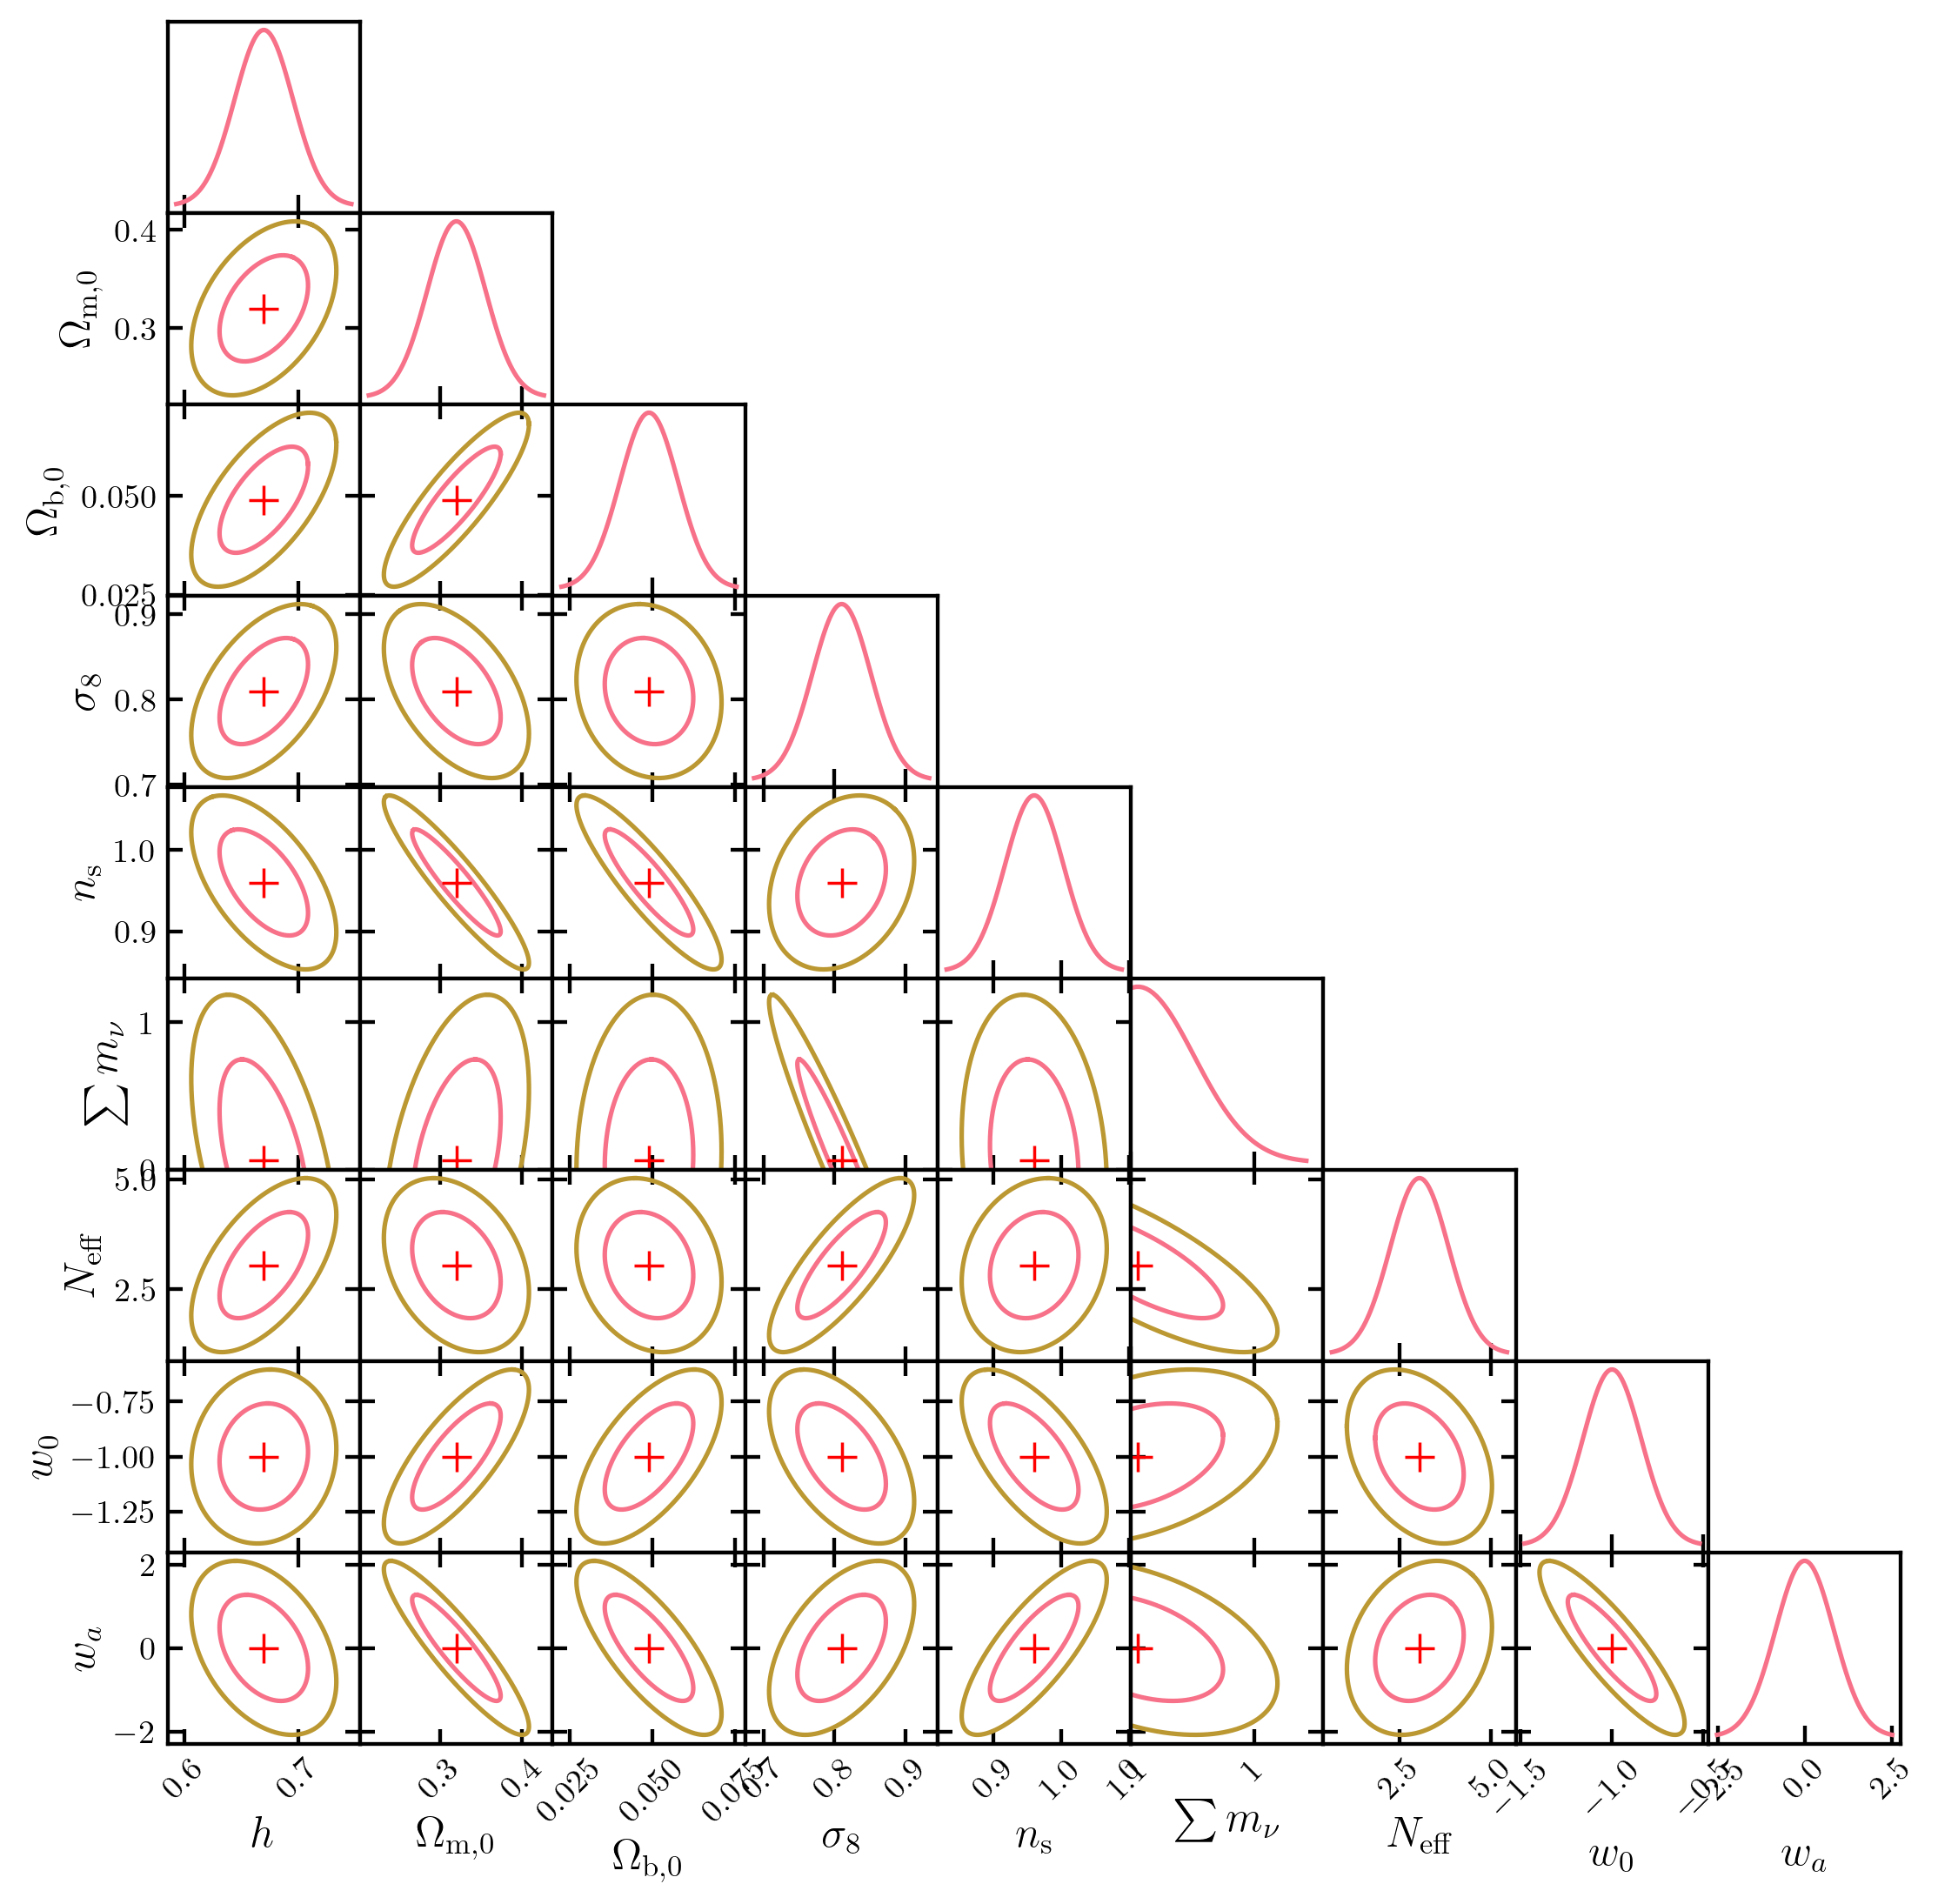

In [6]:
fig=get_figure(cov.values,['h','omega_m0','omega_b0','sigma_8','n_s','m_nu','N_eff','w0','wa'])